In [12]:
import os
import pandas as pd
from importlib import reload
import consts
import json
import enhanced_mtdna_haplogroup_association as mha
import haplogroup_mutation_analysis_plot as haplo_plot

reload(consts)
reload(mha)
reload(haplo_plot)
PATH = os.path.dirname(os.getcwd())
hs_pop_seq = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv'))
# Save just index as ID into a new df
hs_pop_seq['ID'] = hs_pop_seq['ID'].astype(str).str[:-1]
hs_pop_seq.set_index('ID', inplace=True)

overlap_start_positions = consts.OVERLAP_START_POSITIONS

2026-01-18 10:20:39,684 - INFO - Loaded haplogroup markers for 33 haplogroups from c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\data\haplogroups\haplogroup_markers.xlsx


In [13]:
overlaps_dict = json.load(open(os.path.join(PATH, 'data', 'overlap_coords_rel.json'), 'r'))
overlaps_dict_abs = json.load(open(os.path.join(PATH, 'data', 'overlap_coords.json'), 'r'))
overlaps_list = [i for i in overlaps_dict.values()]
#Flatten the list of lists
overlaps_list = [item for sublist in overlaps_list for item in sublist]


In [14]:
len(hs_pop_seq)

66328

In [15]:
overlaps_list_with_genes = []
# Associate each overlap region with genes, and add it as a last element to each overlap entry
gene_mdp = {'RNR2' : ['SHLP1', 'SHLP2', 'SHLP3', 'SHLP4', 'SHLP5', 'SHLP6', 'Hum'], 'RNR1' : ['MOTSc'], 'COX1' : ['ALTCO1', 'GAU'], 'TS2_TL2_ND5' : ['SHMOOSE'], 'CYTB' : ['CYTB-187AA'], 'ND4' : ['ALTND4']}
# Flip the dictionary so that keys are mdps and values are genes
mdp_gene = {}
for gene, mdps in gene_mdp.items():
    for mdp in mdps:
        mdp_gene[mdp] = gene

for overlap in overlaps_list:
    mdp = overlap[0]
    if mdp in mdp_gene:
        gene = mdp_gene[mdp]
        overlap.append(gene)
    overlaps_list_with_genes.append(overlap)

In [16]:
overlaps_list

[['SHLP3', 32, 149, 'RNR2'],
 ['SHLP2', 417, 498, 'RNR2'],
 ['SHLP4', 771, 852, 'RNR2'],
 ['SHLP1', 814, 889, 'RNR2'],
 ['Hum', 962, 1037, 'RNR2'],
 ['SHLP5', 1109, 1184, 'RNR2'],
 ['SHLP6', 1319, 1382, 'RNR2'],
 ['MOTSc', 695, 746, 'RNR1'],
 ['ALTCO1', 185, 965, 'COX1'],
 ['GAU', 404, 686, 'COX1'],
 ['SHMOOSE', 27, 204, 'TS2_TL2_ND5'],
 ['ALTND4', 797, 1097, 'ND4'],
 ['Overlap Region', 290, 297],
 ['Overlap Region', 161, 207],
 ['CYTB-187AA', 86, 650, 'CYTB']]

In [18]:
reload(mha)
# Initialize the haplogroup association analyzer
analyzer = mha.MtDNAHaplogroupAssociation(
    hs_pop_seq=hs_pop_seq,
    haplogroup_file=os.path.join(PATH, 'data', 'haplogroups', 'all_haplogroups_cleaned.csv'),
    mode = 'gene', 
    sequence_column = consts.GENE_START_DICT,
)
#analyzer.debug_data_structure()

2026-01-18 10:20:59,197 - INFO - Loaded haplogroup markers for 33 haplogroups from c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\data\haplogroups\haplogroup_markers.xlsx


2026-01-18 10:20:59,261 - INFO - Sequence dataframe shape: (66328, 35)
2026-01-18 10:20:59,261 - INFO - Sequence dataframe index type: <class 'str'>
2026-01-18 10:20:59,262 - INFO - Haplogroup dataframe shape: (66228, 7)
2026-01-18 10:20:59,262 - INFO - Haplogroup ID column 'SampleID' type: object
2026-01-18 10:20:59,263 - INFO - Analysis mode: gene
2026-01-18 10:20:59,265 - INFO - Created SampleID column from dataframe index
2026-01-18 10:20:59,265 - INFO - Sample sequence IDs: ['PP134863', 'PV067394', 'PV067393', 'PV067392', 'PV067391']
2026-01-18 10:20:59,265 - INFO - Sample haplogroup IDs: ['MF056218', 'MF056219', 'MF056220', 'MF056221', 'MF056222']
2026-01-18 10:20:59,282 - INFO - ID overlap between datasets: 66228 samples
2026-01-18 10:20:59,338 - INFO - Haplogroup distribution:
MajorHaplogroup
H          14137
U           5830
B           5489
M           3751
D           3168
J           3140
T           3031
M_other     2773
L3          2365
F           2311
C           2294
K

In [19]:
# Add ATP8_ATP5_overlap and ND4L_ND4_overlap to overlap_start_positions
overlap_start_positions['ND4L_4_overlap_seq_upstream'] = 10758
overlap_start_positions['ATP8_6_overlap_seq_upstream'] = 8524

2026-01-18 10:22:17,294 - INFO - Loaded haplogroup markers for 33 haplogroups from c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\data\haplogroups\haplogroup_markers.xlsx


2026-01-18 10:22:17,367 - INFO - Sequence dataframe shape: (66328, 35)
2026-01-18 10:22:17,367 - INFO - Sequence dataframe index type: <class 'str'>
2026-01-18 10:22:17,368 - INFO - Haplogroup dataframe shape: (66228, 7)
2026-01-18 10:22:17,368 - INFO - Haplogroup ID column 'SampleID' type: object
2026-01-18 10:22:17,368 - INFO - Analysis mode: gene
2026-01-18 10:22:17,370 - INFO - Created SampleID column from dataframe index
2026-01-18 10:22:17,371 - INFO - Sample sequence IDs: ['PP134863', 'PV067394', 'PV067393', 'PV067392', 'PV067391']
2026-01-18 10:22:17,371 - INFO - Sample haplogroup IDs: ['MF056218', 'MF056219', 'MF056220', 'MF056221', 'MF056222']
2026-01-18 10:22:17,386 - INFO - ID overlap between datasets: 66228 samples
2026-01-18 10:22:17,424 - INFO - Haplogroup distribution:
MajorHaplogroup
H          14137
U           5830
B           5489
M           3751
D           3168
J           3140
T           3031
M_other     2773
L3          2365
F           2311
C           2294
K


ENHANCED HAPLOGROUP ASSOCIATION ANALYSIS SUMMARY
Genes analyzed: 15
High frequency mutations found: 43
Genes with significant associations: 10
Total significant associations: 43

HAPLOGROUP MARKERS DETECTED:
Haplogroups with markers: 7
Total markers detected: 10
Haplogroups with validated markers: 5
  L0: T6185C (freq: 98.3%, validation: 10.0%)
  F: A6505G (freq: 97.6%, validation: 20.0%)
  T: G14905A (freq: 97.1%, validation: 7.1%)
  X: T6221C (freq: 95.9%, validation: 33.3%)
  W: C11674T (freq: 98.1%, validation: 6.7%)

MOST SIGNIFICANT ASSOCIATIONS:
1. SHLP3_seq:C1803T (p = 0.00e+00)
2. SHLP3_seq:T1711C (p = 0.00e+00)
3. SHLP3_seq:T1786C (p = 0.00e+00)
4. SHLP5_seq:G2845A (p = 0.00e+00)
5. SHLP6_seq:G3010A (p = 0.00e+00)

Results saved to: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\data\enhanced_haplogroup_analysis


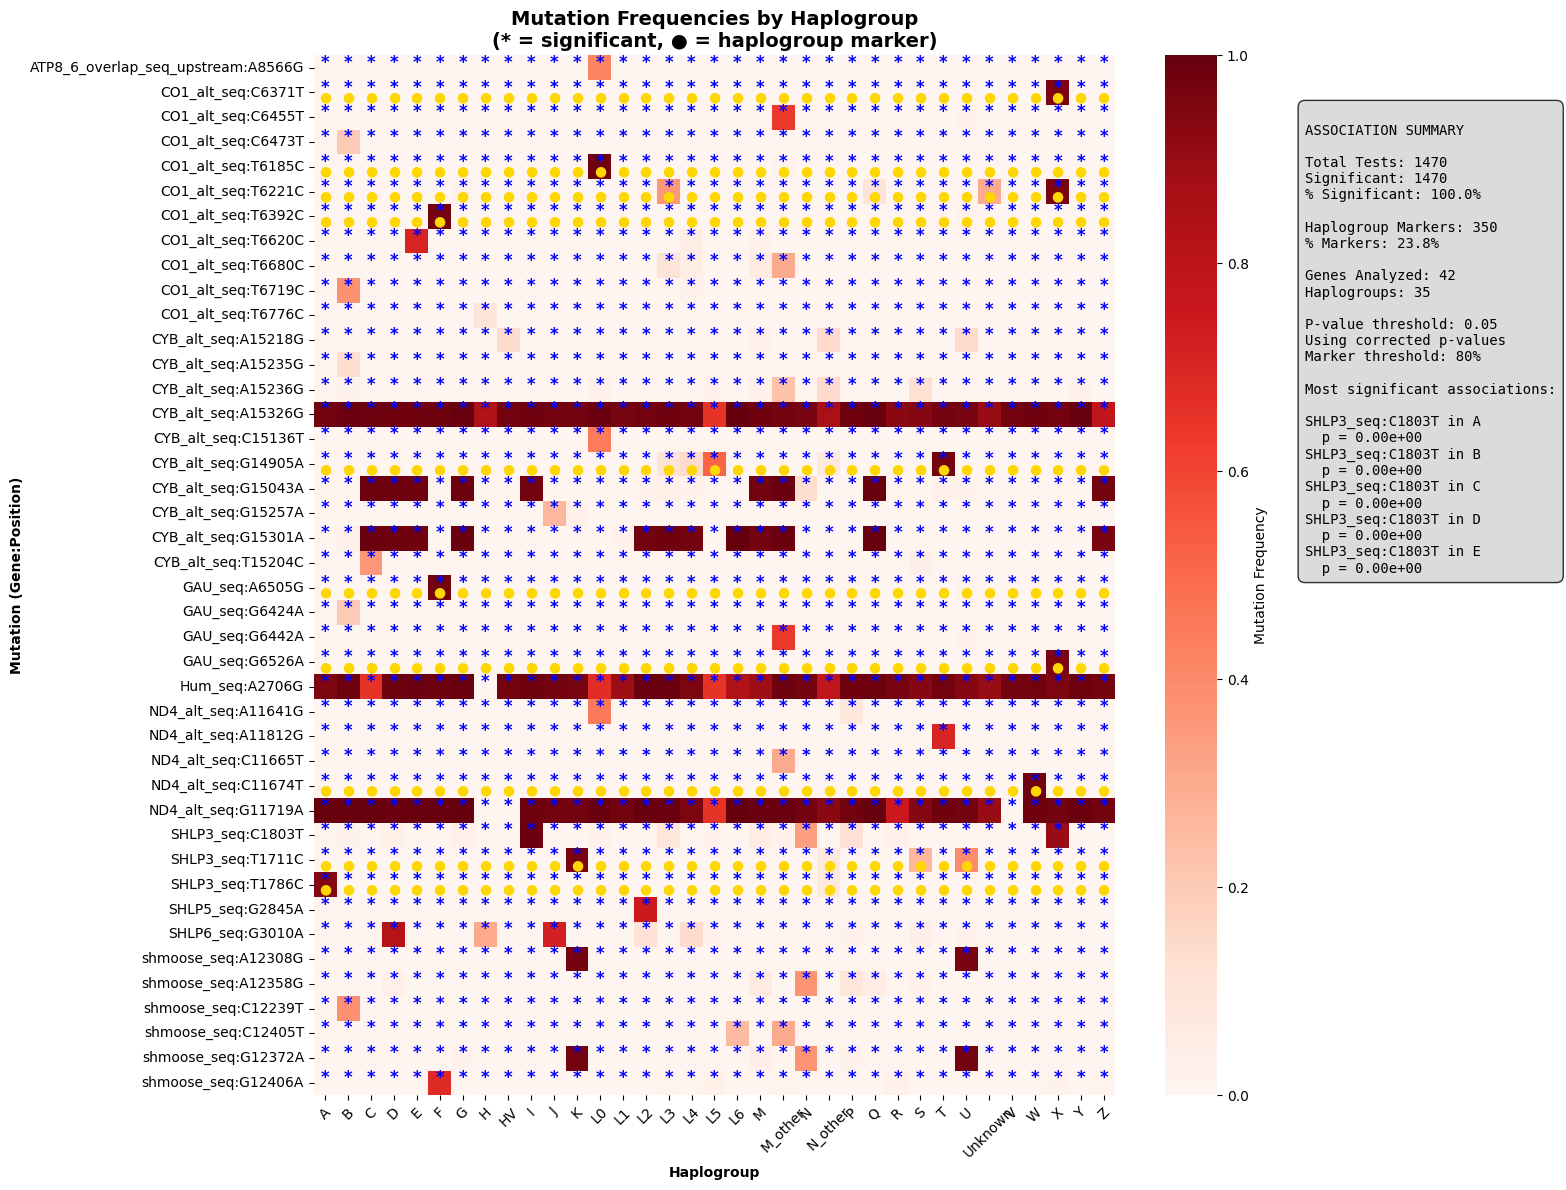

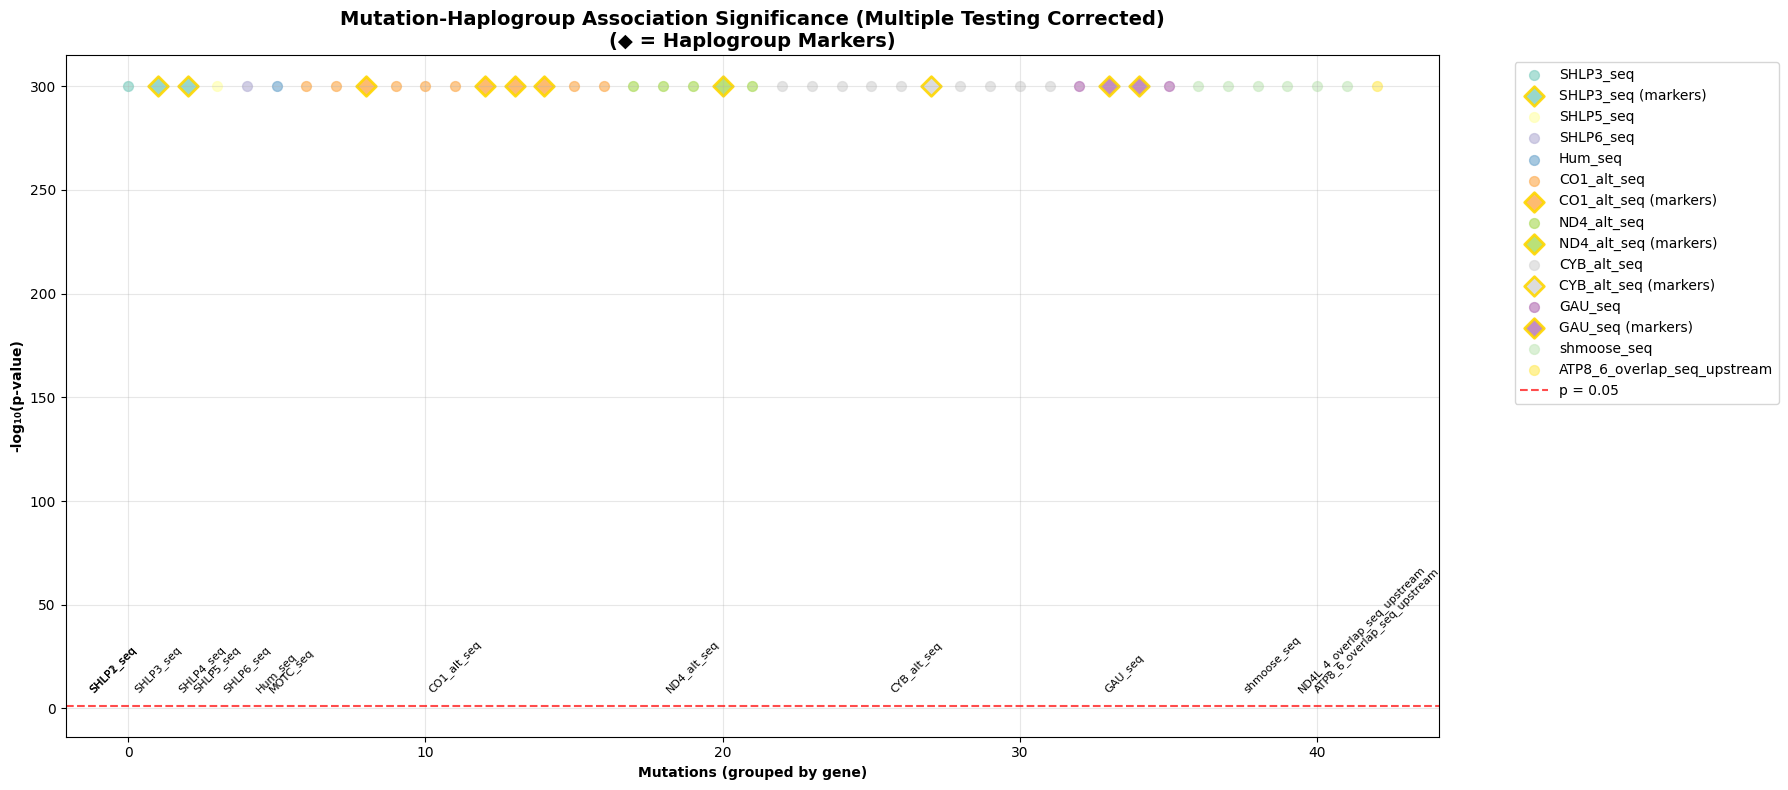

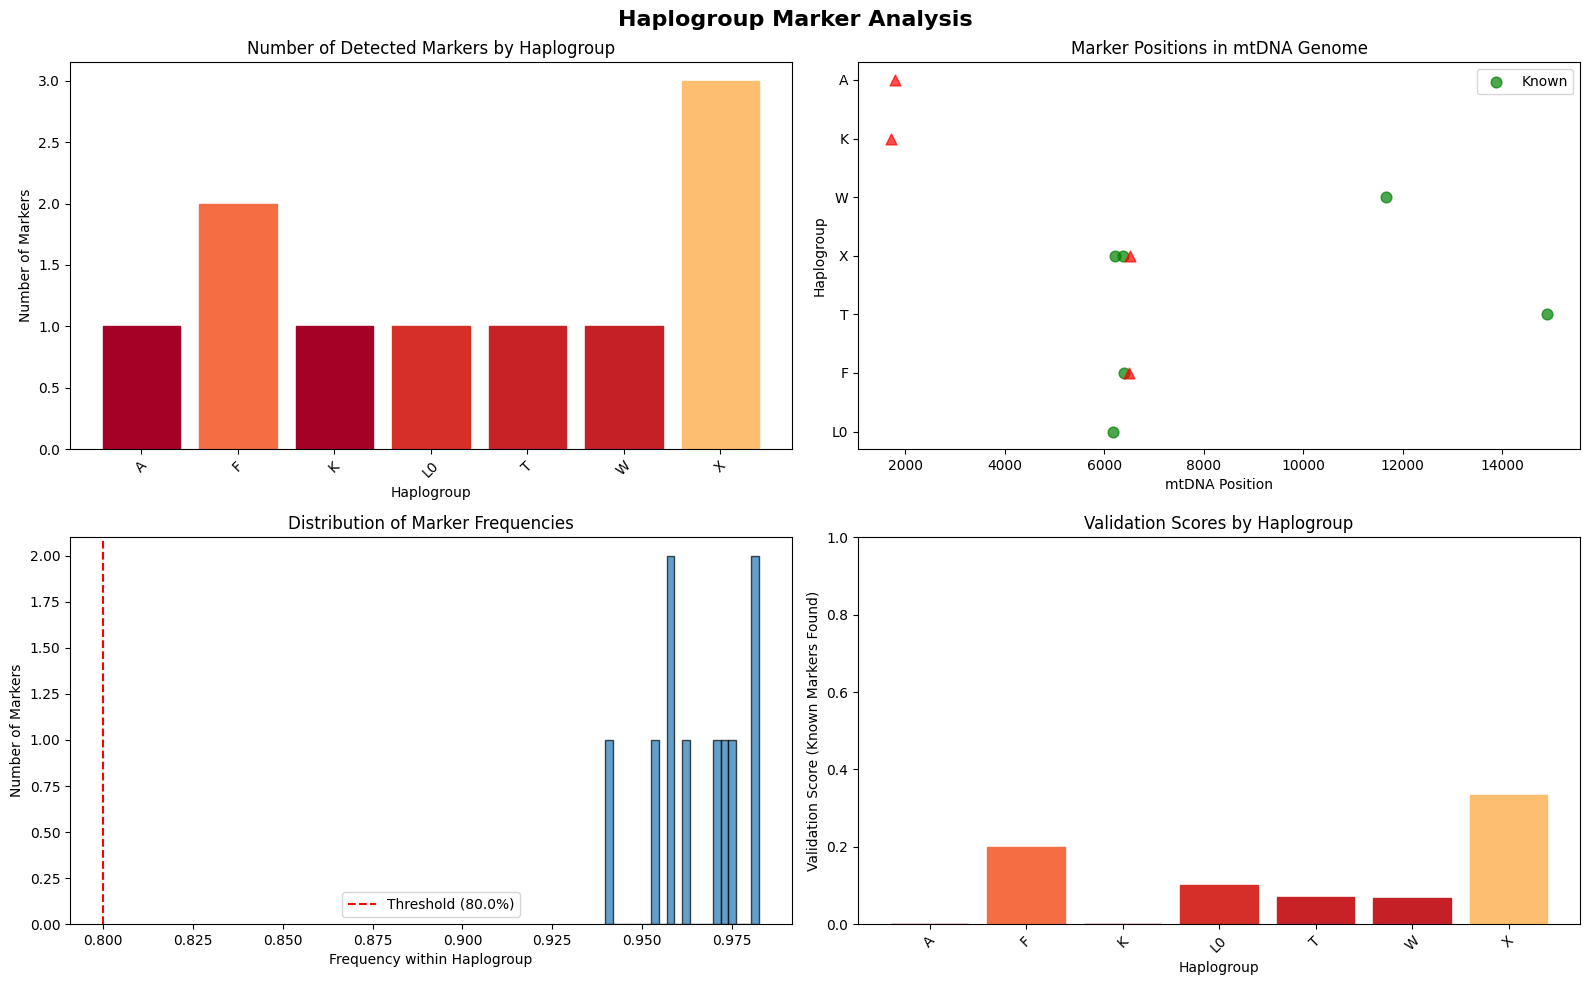

In [ ]:
reload(mha)

# 1. BASIC USAGE - Run complete analysis:
# This will run the full haplogroup association analysis with specified parameters and generate plots.
analyzer = mha.run_haplogroup_association_analysis(
    hs_pop_seq=hs_pop_seq,  # Your sequence dataframe
    haplogroup_file=os.path.join(PATH, 'data', 'haplogroups', 'all_haplogroups_cleaned.csv'),  # Your haplogroup file
    frequency_threshold=0.01,  # 1% frequency threshold
    reference_id = consts.RCRS_ACCS,  # Reference sequence ID
    generate_plots=True,
    marker_threshold = .8,
    output_dir = os.path.join(PATH, 'data', 'enhanced_haplogroup_analysis'),
    accession_id = consts.RCRS_ACCS,  # Accession ID for the reference sequence,
    mode = 'gene',
    sequence_column = overlap_start_positions,
    filter_sequences = True,    
)
    

Starting haplogroup mutation analysis...
Loaded associations data with shape: (43, 45)
Columns: ['Gene', 'Mutation', 'Absolute_Position', 'N_Carriers', 'N_Total', 'Test_Method', 'P_Value', 'P_Corrected', 'Significant_Uncorrected', 'Significant_Corrected', 'Freq_A', 'Freq_B', 'Freq_C', 'Freq_D', 'Freq_E', 'Freq_F', 'Freq_G', 'Freq_H', 'Freq_HV', 'Freq_I', 'Freq_J', 'Freq_K', 'Freq_L0', 'Freq_L1', 'Freq_L2', 'Freq_L3', 'Freq_L4', 'Freq_L5', 'Freq_L6', 'Freq_M', 'Freq_M_other', 'Freq_N', 'Freq_N_other', 'Freq_P', 'Freq_Q', 'Freq_R', 'Freq_S', 'Freq_T', 'Freq_U', 'Freq_Unknown', 'Freq_V', 'Freq_W', 'Freq_X', 'Freq_Y', 'Freq_Z']
Found 35 haplogroups: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HV', 'I', 'J', 'K', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'M', 'M_other', 'N', 'N_other', 'P', 'Q', 'R', 'S', 'T', 'U', 'Unknown', 'V', 'W', 'X', 'Y', 'Z']
Reshaped data: 676 gene-mutation-haplogroup combinations
Filtered to 264 gene-haplogroup combinations with frequency >= 1.0%
Found 10 genes with

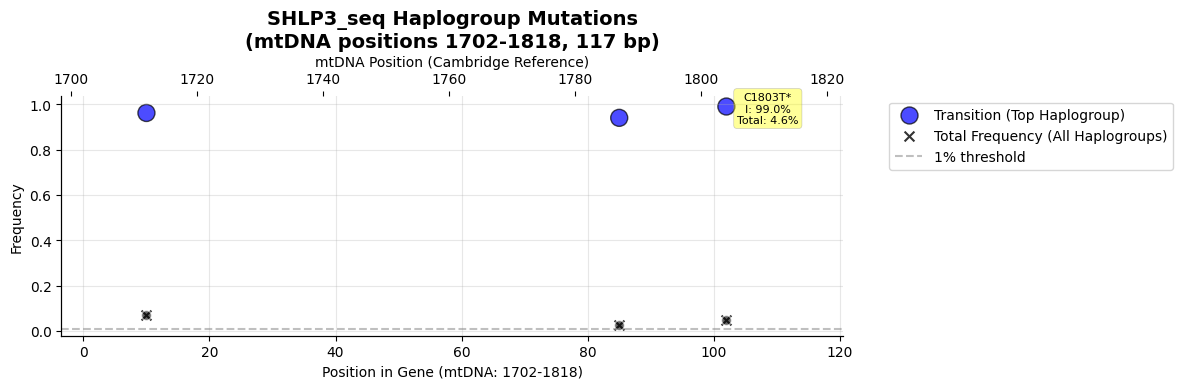

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\SHLP3_seq_haplogroup_mutations_frequency.png

Summary for SHLP3_seq:
  Gene length: 117 bp
  mtDNA position: 1702-1818
  Number of mutation positions: 3
  Total mutations across haplogroups: 22
  Top haplogroup frequency range: 94.0% - 99.0%
  Total frequency range: 2.7% - 7.0%
  Most common haplogroup: I (1 positions)
  Substitution types: {'Transition': np.int64(3)}
  Significant mutations (corrected): 3/3
  Mean ratio (top haplogroup / total frequency): 23.46
  Positions with >10% total frequency: 0

Analyzing Hum_seq...
  Using mtDNA start position: 2632
Converted absolute positions to gene-relative (subtracted 2631)
  Position range: 75 - 75


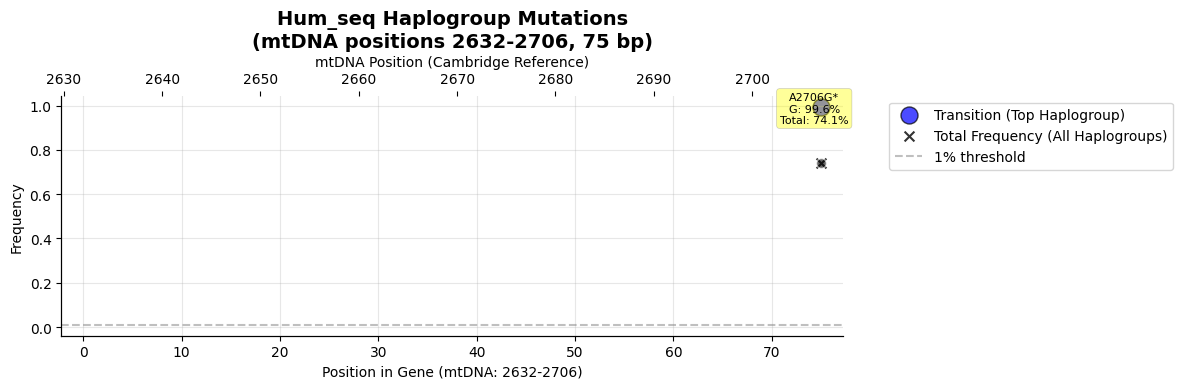

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\Hum_seq_haplogroup_mutations_frequency.png

Summary for Hum_seq:
  Gene length: 75 bp
  mtDNA position: 2632-2706
  Number of mutation positions: 1
  Total mutations across haplogroups: 34
  Top haplogroup frequency range: 99.6% - 99.6%
  Total frequency range: 74.1% - 74.1%
  Most common haplogroup: G (1 positions)
  Substitution types: {'Transition': np.int64(1)}
  Significant mutations (corrected): 1/1
  Mean ratio (top haplogroup / total frequency): 1.34
  Positions with >10% total frequency: 1

Analyzing CO1_alt_seq...
  Using mtDNA start position: 6088
Converted absolute positions to gene-relative (subtracted 6087)
  Position range: 98 - 728


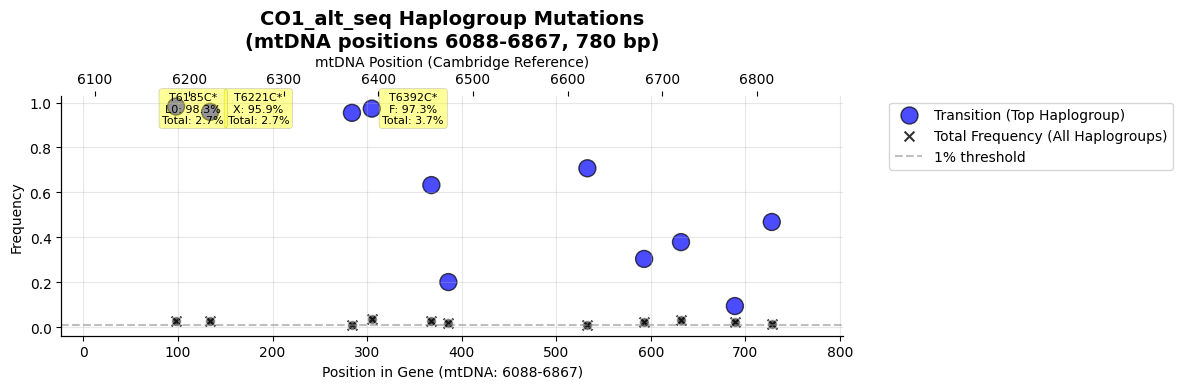

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\CO1_alt_seq_haplogroup_mutations_frequency.png

Summary for CO1_alt_seq:
  Gene length: 780 bp
  mtDNA position: 6088-6867
  Number of mutation positions: 11
  Total mutations across haplogroups: 33
  Top haplogroup frequency range: 9.4% - 98.3%
  Total frequency range: 1.0% - 3.7%
  Most common haplogroup: B (2 positions)
  Substitution types: {'Transition': np.int64(11)}
  Significant mutations (corrected): 11/11
  Mean ratio (top haplogroup / total frequency): 32.68
  Positions with >10% total frequency: 0

Analyzing ND4_alt_seq...
  Using mtDNA start position: 11556
Converted absolute positions to gene-relative (subtracted 11555)
  Position range: 86 - 257


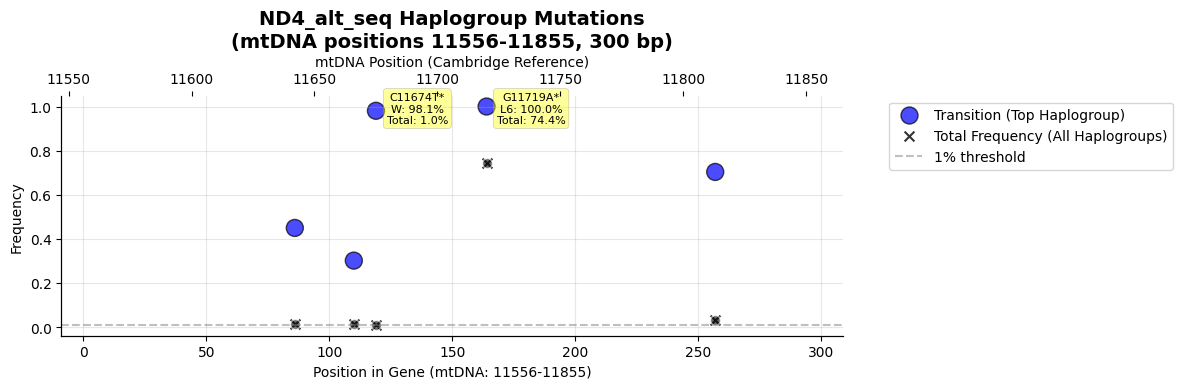

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\ND4_alt_seq_haplogroup_mutations_frequency.png

Summary for ND4_alt_seq:
  Gene length: 300 bp
  mtDNA position: 11556-11855
  Number of mutation positions: 5
  Total mutations across haplogroups: 39
  Top haplogroup frequency range: 30.1% - 100.0%
  Total frequency range: 1.0% - 74.4%
  Most common haplogroup: L6 (1 positions)
  Substitution types: {'Transition': np.int64(5)}
  Significant mutations (corrected): 5/5
  Mean ratio (top haplogroup / total frequency): 35.11
  Positions with >10% total frequency: 1

Analyzing CYB_alt_seq...
  Using mtDNA start position: 14832
Converted absolute positions to gene-relative (subtracted 14831)
  Position range: 74 - 495


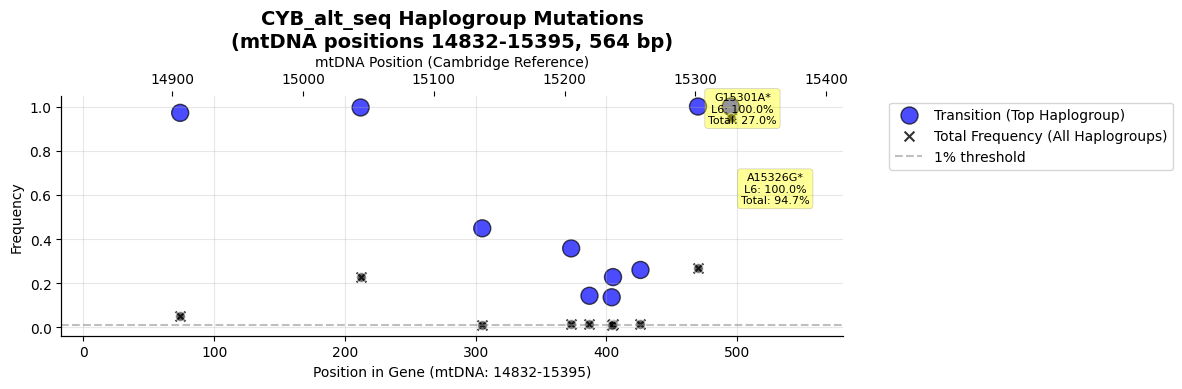

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\CYB_alt_seq_haplogroup_mutations_frequency.png

Summary for CYB_alt_seq:
  Gene length: 564 bp
  mtDNA position: 14832-15395
  Number of mutation positions: 10
  Total mutations across haplogroups: 93
  Top haplogroup frequency range: 13.6% - 100.0%
  Total frequency range: 1.1% - 94.7%
  Most common haplogroup: L6 (2 positions)
  Substitution types: {'Transition': np.int64(10)}
  Significant mutations (corrected): 10/10
  Mean ratio (top haplogroup / total frequency): 14.80
  Positions with >10% total frequency: 3

Analyzing GAU_seq...
  Using mtDNA start position: 6307
Converted absolute positions to gene-relative (subtracted 6306)
  Position range: 118 - 220


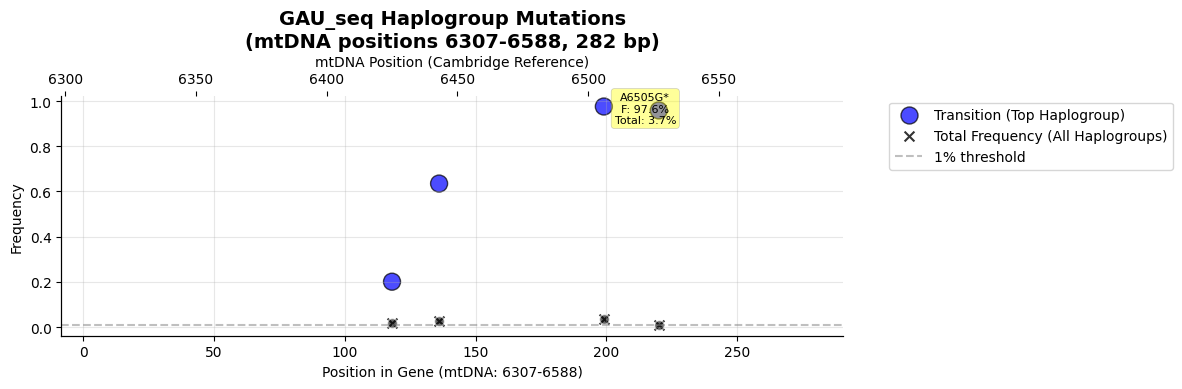

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\GAU_seq_haplogroup_mutations_frequency.png

Summary for GAU_seq:
  Gene length: 282 bp
  mtDNA position: 6307-6588
  Number of mutation positions: 4
  Total mutations across haplogroups: 6
  Top haplogroup frequency range: 20.1% - 97.6%
  Total frequency range: 1.0% - 3.7%
  Most common haplogroup: B (1 positions)
  Substitution types: {'Transition': np.int64(4)}
  Significant mutations (corrected): 4/4
  Mean ratio (top haplogroup / total frequency): 38.52
  Positions with >10% total frequency: 0

Analyzing shmoose_seq...
  Using mtDNA start position: 12233
Converted absolute positions to gene-relative (subtracted 12232)
  Position range: 7 - 174


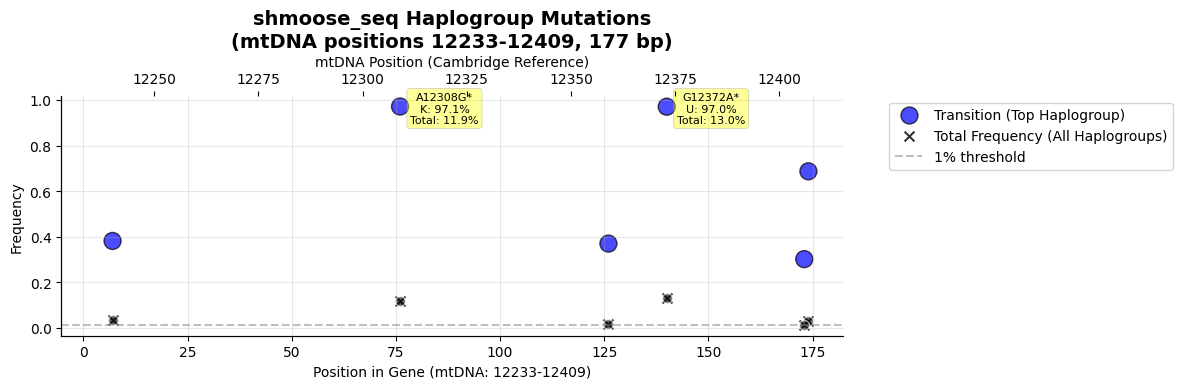

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\shmoose_seq_haplogroup_mutations_frequency.png

Summary for shmoose_seq:
  Gene length: 177 bp
  mtDNA position: 12233-12409
  Number of mutation positions: 6
  Total mutations across haplogroups: 25
  Top haplogroup frequency range: 30.1% - 97.1%
  Total frequency range: 1.3% - 13.0%
  Most common haplogroup: B (1 positions)
  Substitution types: {'Transition': np.int64(6)}
  Significant mutations (corrected): 6/6
  Mean ratio (top haplogroup / total frequency): 16.71
  Positions with >10% total frequency: 2

Analyzing SHLP6_seq...
  Using mtDNA start position: 2989
Converted absolute positions to gene-relative (subtracted 2988)
  Position range: 22 - 22


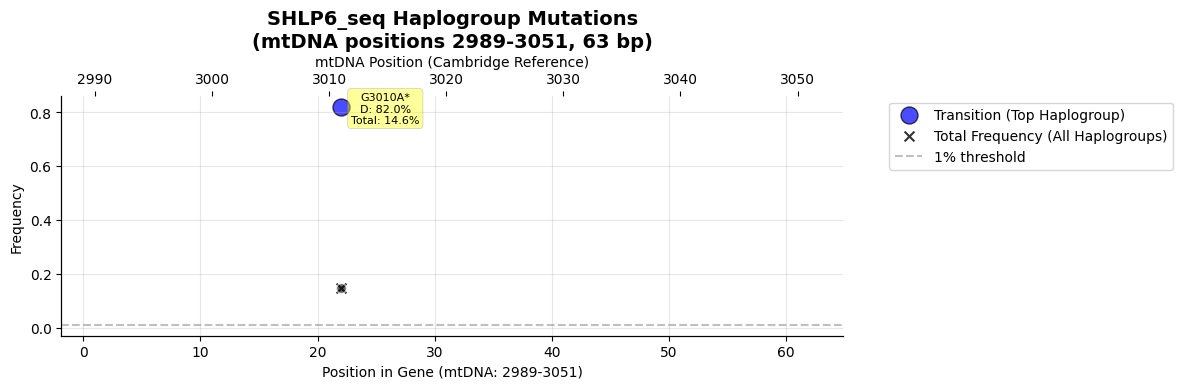

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\SHLP6_seq_haplogroup_mutations_frequency.png

Summary for SHLP6_seq:
  Gene length: 63 bp
  mtDNA position: 2989-3051
  Number of mutation positions: 1
  Total mutations across haplogroups: 10
  Top haplogroup frequency range: 82.0% - 82.0%
  Total frequency range: 14.6% - 14.6%
  Most common haplogroup: D (1 positions)
  Substitution types: {'Transition': np.int64(1)}
  Significant mutations (corrected): 1/1
  Mean ratio (top haplogroup / total frequency): 5.62
  Positions with >10% total frequency: 1

Analyzing ATP8_6_overlap_seq_upstream...
  Using mtDNA start position: 8524
Converted absolute positions to gene-relative (subtracted 8523)
  Position range: 43 - 43


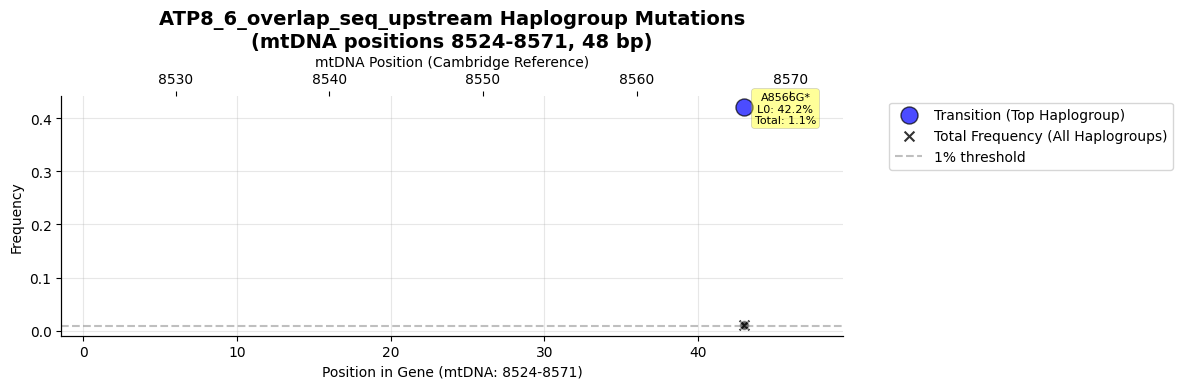

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\ATP8_6_overlap_seq_upstream_haplogroup_mutations_frequency.png

Summary for ATP8_6_overlap_seq_upstream:
  Gene length: 48 bp
  mtDNA position: 8524-8571
  Number of mutation positions: 1
  Total mutations across haplogroups: 1
  Top haplogroup frequency range: 42.2% - 42.2%
  Total frequency range: 1.1% - 1.1%
  Most common haplogroup: L0 (1 positions)
  Substitution types: {'Transition': np.int64(1)}
  Significant mutations (corrected): 1/1
  Mean ratio (top haplogroup / total frequency): 36.88
  Positions with >10% total frequency: 0

Analyzing SHLP5_seq...
  Using mtDNA start position: 2779
Converted absolute positions to gene-relative (subtracted 2778)
  Position range: 67 - 67


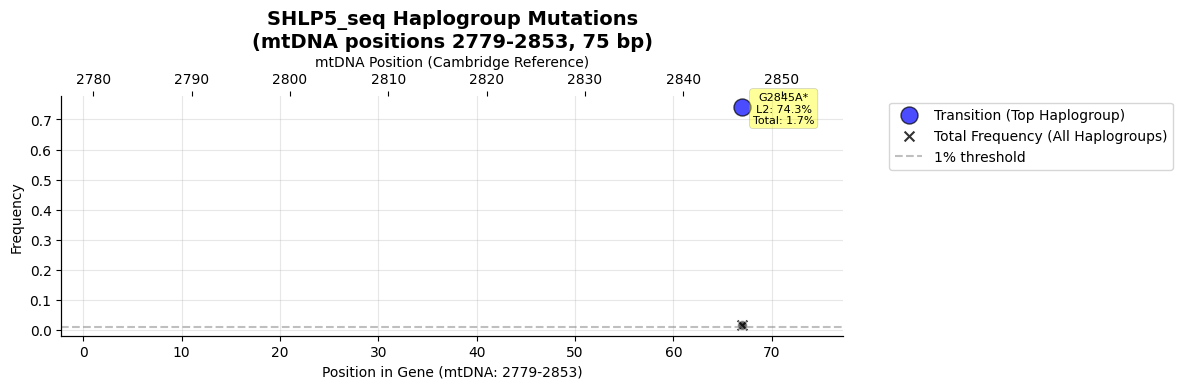

Plot saved: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots\SHLP5_seq_haplogroup_mutations_frequency.png

Summary for SHLP5_seq:
  Gene length: 75 bp
  mtDNA position: 2779-2853
  Number of mutation positions: 1
  Total mutations across haplogroups: 1
  Top haplogroup frequency range: 74.3% - 74.3%
  Total frequency range: 1.7% - 1.7%
  Most common haplogroup: L2 (1 positions)
  Substitution types: {'Transition': np.int64(1)}
  Significant mutations (corrected): 1/1
  Mean ratio (top haplogroup / total frequency): 43.20
  Positions with >10% total frequency: 0

ANALYSIS SUMMARY
Total genes analyzed: 10
Total gene-haplogroup combinations: 264
Output directory: c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\figures\enhanced_haplogroup_mutation_plots

Mutations per gene:
  SHLP3_seq: 22 combinations, 3 positions, 19 haplogroups, max freq: 99.0%, significant: 22
  Hum_seq: 34 combinations, 1 posit

In [22]:
reload(haplo_plot)
# Run the analysis
results = haplo_plot.analyze_haplogroup_mutations(
    excel_file=os.path.join(PATH, 'data', 'enhanced_haplogroup_analysis', 'haplogroup_associations_enhanced.xlsx'),
    hs_pop_df=hs_pop_seq,
    ignore_trna=True,  # Skip tRNA genes
    output_dir=os.path.join(PATH, 'figures', 'enhanced_haplogroup_mutation_plots'),
    min_frequency=0.01,  # 1% threshold
    figsize=(12, 4),
    show_absolute_positions = True,
    gene_start_positions = overlap_start_positions,
    positions_are_absolute = True,
    codon_table_id = 2,   
    single_panel = True,
    show_aa_change = False,
    annotate_mutations = {'ND4_alt_seq': ['C11674T']}
)


In [23]:
# Unite all keys of results into a single dataframe
all_results_df = pd.DataFrame()
for gene, df in results.items():
    df['Gene'] = gene
    all_results_df = pd.concat([all_results_df, df], ignore_index=True)

In [24]:
all_results_df.to_csv(os.path.join(PATH, 'data', 'enhanced_haplogroup_analysis', 'haplogroup_mutation_analysis_results_overlap_regions_combined.csv'), index=False)